<a href="https://colab.research.google.com/github/namanhnt/Hanoi-Air-Quality-Analysis/blob/main/MAGAZINE_ANALYSIS_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HND VS OXCHARITY - BACKGROUND STIMULI IN MAGAZINE ANALYSIS REPORT**


## **Part 1: Import Data and Wrangle Data**

### **1.1. Import Libraries**

In [12]:
!pip install openpyxl
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### **1.2. Import Data from Google Drive**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### ***1.2.1. HND Magazines***

In [14]:
hnd_file_path = '/content/drive/My Drive/Colab Notebooks/NeuroMarketing/HND - emotion data.xlsx'
df_hnd = pd.read_excel(hnd_file_path, engine='openpyxl')
df_hnd.head()

,start_time,end_time,num_participants,num_samples,emotions.puzzlement.value,emotions.disgust.value,emotions.fear.value,emotions.joy.value,emotions.neutral.value,emotions.sadness.value,emotions.surprise.value,mood.negative.value,mood.positive.value,mood.valence.value
0,0,249,3,51,0.277,0.011,0.010,0.011,0.354,0.059,0.102,0.303,0.011,-0.293
1,250,499,3,63,0.261,0.011,0.011,0.011,0.344,0.058,0.105,0.289,0.011,-0.278
2,500,749,3,74,0.243,0.011,0.013,0.010,0.341,0.057,0.109,0.269,0.010,-0.259
3,750,999,3,85,0.242,0.010,0.013,0.009,0.349,0.066,0.109,0.273,0.009,-0.264
4,1000,1249,3,93,0.225,0.010,0.013,0.008,0.355,0.065,0.111,0.256,0.008,-0.248


In [15]:
hnd_inverse_file_path = '/content/drive/My Drive/Colab Notebooks/NeuroMarketing/HND Inverse - emotion data.xlsx'
df_hnd_inverse = pd.read_excel(hnd_inverse_file_path, engine='openpyxl')
df_hnd_inverse.head()

,start_time,end_time,num_participants,num_samples,emotions.puzzlement.value,emotions.disgust.value,emotions.fear.value,emotions.joy.value,emotions.neutral.value,emotions.sadness.value,emotions.surprise.value,mood.negative.value,mood.positive.value,mood.valence.value
0,0,249,3,50,0.129,0.008,0.015,0.017,0.485,0.067,0.076,0.169,0.017,-0.151
1,250,499,3,61,0.131,0.009,0.015,0.016,0.486,0.066,0.076,0.167,0.016,-0.151
2,500,749,3,73,0.130,0.009,0.015,0.014,0.481,0.066,0.076,0.165,0.014,-0.151
3,750,999,3,85,0.128,0.009,0.015,0.014,0.475,0.067,0.078,0.165,0.014,-0.151
4,1000,1249,3,93,0.124,0.009,0.015,0.017,0.468,0.066,0.077,0.161,0.017,-0.144


In [16]:
print("df_hnd Data Info:")
df_hnd.info()
print("\n" + "-"*50 + "\n")  # Adds a separator with 50 dashes and a newline
print("df_hnd_inverse Data Info:")
df_hnd_inverse.info()


df_hnd Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 51 non-null     int64  
 1   end_time                   51 non-null     int64  
 2   num_participants           51 non-null     int64  
 3   num_samples                51 non-null     int64  
 4   emotions.puzzlement.value  51 non-null     float64
 5   emotions.disgust.value     51 non-null     float64
 6   emotions.fear.value        51 non-null     float64
 7   emotions.joy.value         51 non-null     float64
 8   emotions.neutral.value     51 non-null     float64
 9   emotions.sadness.value     51 non-null     float64
 10  emotions.surprise.value    51 non-null     float64
 11  mood.negative.value        51 non-null     float64
 12  mood.positive.value        51 non-null     float64
 13  mood.valence.value         51 non-

#### ***1.2.2. OxCharity Magazines***

In [17]:
ox_file_path = '/content/drive/My Drive/Colab Notebooks/NeuroMarketing/OxFoodBank - emotion data.xlsx'
df_ox = pd.read_excel(ox_file_path, engine='openpyxl')
df_ox.head()

,start_time,end_time,num_participants,num_samples,emotions.puzzlement.value,emotions.disgust.value,emotions.fear.value,emotions.joy.value,emotions.neutral.value,emotions.sadness.value,emotions.surprise.value,mood.negative.value,mood.positive.value,mood.valence.value
0,0,249,3,51,0.188,0.015,0.013,0.008,0.281,0.068,0.063,0.218,0.008,-0.210
1,250,499,3,63,0.177,0.013,0.013,0.009,0.277,0.073,0.063,0.209,0.009,-0.200
2,500,749,3,74,0.208,0.012,0.014,0.010,0.287,0.070,0.064,0.236,0.010,-0.226
3,750,999,3,84,0.221,0.011,0.015,0.010,0.292,0.068,0.067,0.250,0.010,-0.240
4,1000,1249,3,93,0.235,0.010,0.015,0.015,0.287,0.064,0.075,0.261,0.015,-0.246


In [18]:
ox_inverse_file_path = '/content/drive/My Drive/Colab Notebooks/NeuroMarketing/OxFoodBank Inverse - emotion data.xlsx'
df_ox_inverse = pd.read_excel(ox_inverse_file_path, engine='openpyxl')
df_ox_inverse.head()

,start_time,end_time,num_participants,num_samples,emotions.puzzlement.value,emotions.disgust.value,emotions.fear.value,emotions.joy.value,emotions.neutral.value,emotions.sadness.value,emotions.surprise.value,mood.negative.value,mood.positive.value,mood.valence.value
0,0,249,3,51,0.087,0.009,0.017,0.019,0.324,0.066,0.114,0.136,0.019,-0.117
1,250,499,3,62,0.089,0.009,0.017,0.018,0.348,0.067,0.122,0.138,0.018,-0.120
2,500,749,3,73,0.106,0.009,0.016,0.018,0.351,0.067,0.127,0.154,0.018,-0.137
3,750,999,3,84,0.107,0.009,0.015,0.023,0.354,0.066,0.126,0.154,0.023,-0.132
4,1000,1249,3,93,0.138,0.009,0.014,0.025,0.351,0.063,0.125,0.182,0.025,-0.157


In [19]:
print("df_ox Data Info:")
df_ox.info()
print("\n" + "-"*50 + "\n")  # Adds a separator with 50 dashes and a newline
print("df_ox_inverse Data Info:")
df_ox_inverse.info()


df_ox Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 67 non-null     int64  
 1   end_time                   67 non-null     int64  
 2   num_participants           67 non-null     int64  
 3   num_samples                67 non-null     int64  
 4   emotions.puzzlement.value  67 non-null     float64
 5   emotions.disgust.value     67 non-null     float64
 6   emotions.fear.value        67 non-null     float64
 7   emotions.joy.value         67 non-null     float64
 8   emotions.neutral.value     67 non-null     float64
 9   emotions.sadness.value     67 non-null     float64
 10  emotions.surprise.value    67 non-null     float64
 11  mood.negative.value        67 non-null     float64
 12  mood.positive.value        67 non-null     float64
 13  mood.valence.value         67 non-n

### **1.3. Wrangle Data**





#### ***1.3.1. HND Magazines***

In [20]:
df_hnd_inverse = df_hnd_inverse.iloc[:51]
df_hnd_inverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 51 non-null     int64  
 1   end_time                   51 non-null     int64  
 2   num_participants           51 non-null     int64  
 3   num_samples                51 non-null     int64  
 4   emotions.puzzlement.value  51 non-null     float64
 5   emotions.disgust.value     51 non-null     float64
 6   emotions.fear.value        51 non-null     float64
 7   emotions.joy.value         51 non-null     float64
 8   emotions.neutral.value     51 non-null     float64
 9   emotions.sadness.value     51 non-null     float64
 10  emotions.surprise.value    51 non-null     float64
 11  mood.negative.value        51 non-null     float64
 12  mood.positive.value        51 non-null     float64
 13  mood.valence.value         51 non-null     float64
d

In [21]:
# Convert start_time and end_time from milliseconds to seconds
df_hnd['start_time'] = df_hnd['start_time'] / 1000
df_hnd['end_time'] = df_hnd['end_time'] / 1000
df_hnd_inverse['start_time'] = df_hnd_inverse['start_time'] / 1000
df_hnd_inverse['end_time'] = df_hnd_inverse['end_time'] / 1000

<ipython-input-21-58c720714dd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hnd_inverse['start_time'] = df_hnd_inverse['start_time'] / 1000
<ipython-input-21-58c720714dd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hnd_inverse['end_time'] = df_hnd_inverse['end_time'] / 1000


#### ***1.3.2. OxCharity Magazines***

In [22]:
df_ox_inverse = df_ox_inverse.iloc[:67]
df_ox_inverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 67 non-null     int64  
 1   end_time                   67 non-null     int64  
 2   num_participants           67 non-null     int64  
 3   num_samples                67 non-null     int64  
 4   emotions.puzzlement.value  67 non-null     float64
 5   emotions.disgust.value     67 non-null     float64
 6   emotions.fear.value        67 non-null     float64
 7   emotions.joy.value         67 non-null     float64
 8   emotions.neutral.value     67 non-null     float64
 9   emotions.sadness.value     67 non-null     float64
 10  emotions.surprise.value    67 non-null     float64
 11  mood.negative.value        67 non-null     float64
 12  mood.positive.value        67 non-null     float64
 13  mood.valence.value         67 non-null     float64
d

In [23]:
# Convert start_time and end_time from milliseconds to seconds
df_ox['start_time'] = df_ox['start_time'] / 1000
df_ox['end_time'] = df_ox['end_time'] / 1000
df_ox_inverse['start_time'] = df_ox_inverse['start_time'] / 1000
df_ox_inverse['end_time'] = df_ox_inverse['end_time'] / 1000

## **Part 2: Analyze Data**

### **2.1. HND Magazine: The Emotional Impact Difference of White and Black Background**

#### **2.1.1. Average Difference and T-test**

In [37]:
# List of the columns with emotional or mood metrics to compare
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value', 'emotions.sadness.value',
                   'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value', 'mood.positive.value', 'mood.negative.value', 'mood.valence.value'
                   ]
# Initialize a dictionary to store the results
comparison_results = {'Metric': [], 'Mean Difference': [], 'T-statistic': [], 'P-value': []}

# Loop through each metric to calculate the mean difference and perform paired t-test
for column in emotion_metrics:
    # Calculate mean difference between the two datasets
    mean_diff = (df_hnd[column]- df_hnd_inverse[column]).mean().round(4)

    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(df_hnd[column], df_hnd_inverse[column])

    # Store the results in the dictionary
    comparison_results['Metric'].append(column)
    comparison_results['Mean Difference'].append(mean_diff)
    comparison_results['T-statistic'].append(t_stat.round(2))
    comparison_results['P-value'].append(p_value.round(4))

# Create a DataFrame from the results
comparison_df = pd.DataFrame(comparison_results)

# Display the comparison DataFrame
print("Comparison of Emotional and Mood Metrics between HND White and HND Black Backgrounds")
comparison_df


Comparison of Emotional and Mood Metrics between HND White and HND Black Backgrounds


,Metric,Mean Difference,T-statistic,P-value
0,emotions.neutral.value,-0.0587,-7.53,0.0000
1,emotions.puzzlement.value,-0.0972,-4.03,0.0002
2,emotions.surprise.value,0.0358,11.92,0.0000
3,emotions.sadness.value,0.0027,1.34,0.1864
4,emotions.fear.value,-0.0073,-10.66,0.0000
5,emotions.disgust.value,0.0059,4.64,0.0000
6,emotions.joy.value,-0.0012,-1.06,0.2951
7,mood.positive.value,-0.0012,-1.06,0.2951
8,mood.negative.value,-0.0919,-4.08,0.0002
9,mood.valence.value,0.0907,3.90,0.0003


#### **2.1.2. Emotional Differences Observed Over a 12-Second Test**

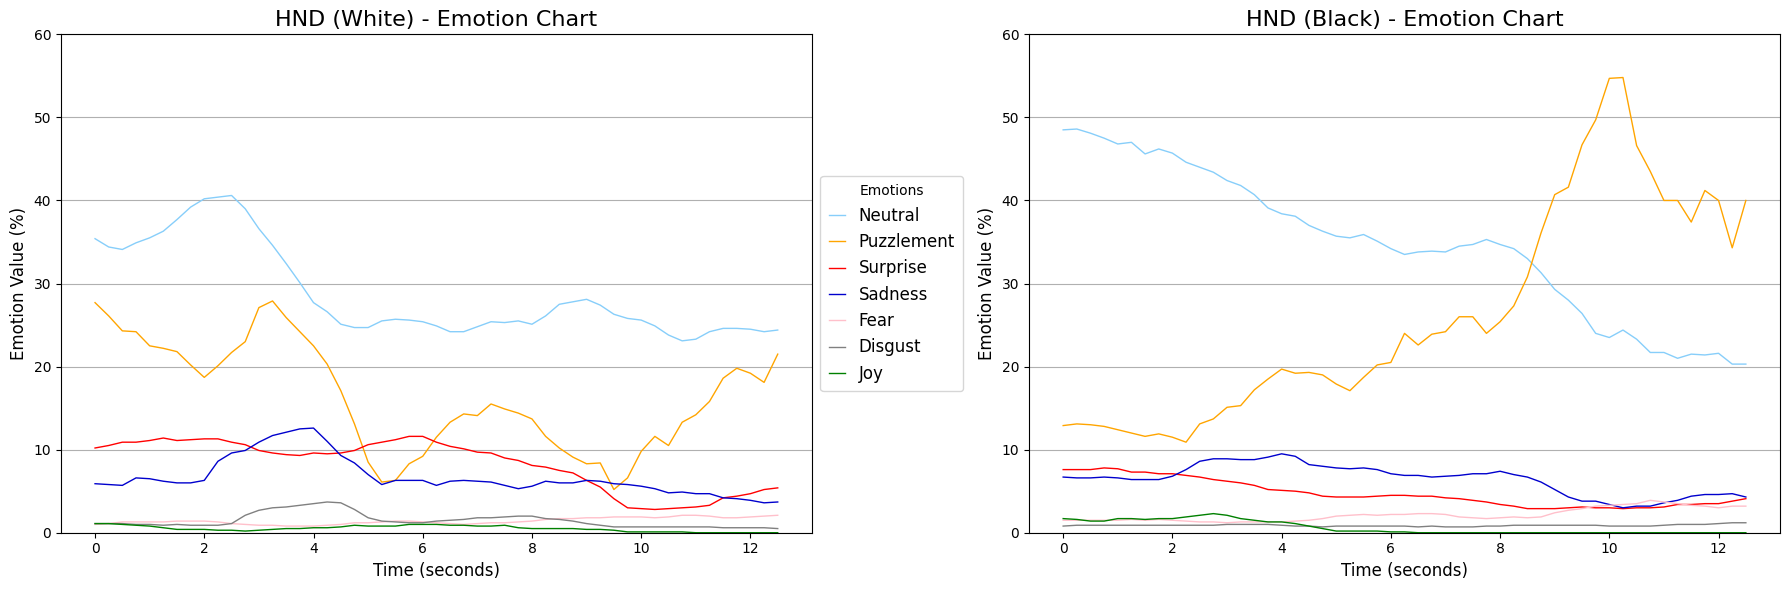

In [52]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of emotions and their corresponding custom colors
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value',
                   'emotions.sadness.value', 'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value']
custom_colors = ['lightskyblue','orange','red','mediumblue','pink', 'grey',  'green']  # Custom colors for each emotion

# Define y-axis limits and ticks (10% increments)
y_ticks = range(0, 101, 10)

# Plot for HND (White) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_hnd['start_time'], df_hnd[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('HND (White) - Emotion Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(0, 60)  # Set y-axis limits
ax1.legend(title="Emotions", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for HND (Black) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_hnd_inverse['start_time'], df_hnd_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('HND (Black) - Emotion Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(0, 60)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Save the figure as a PNG image
plt.savefig('emotion_comparison_hnd.png', dpi=300, bbox_inches='tight')

# Show the side-by-side plots
plt.show()


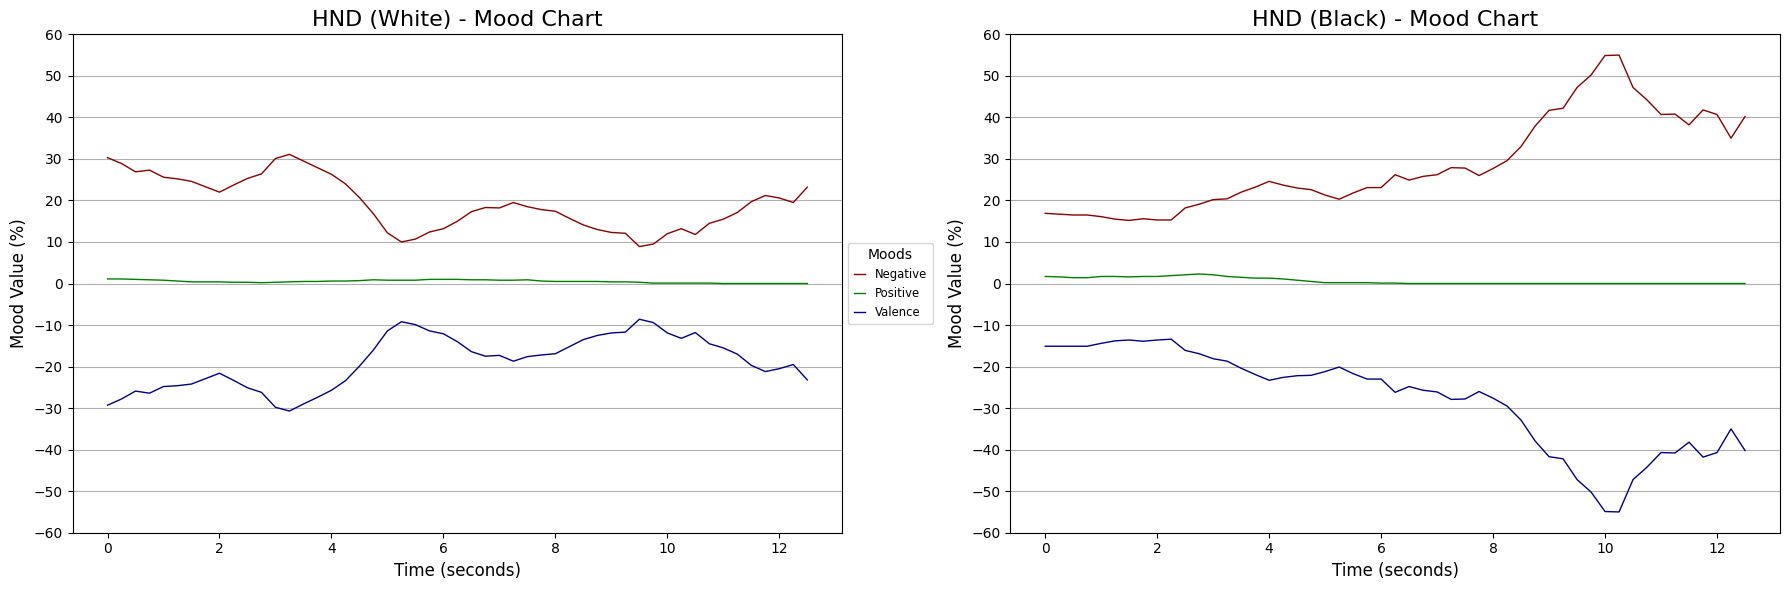

In [39]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of moods and their corresponding custom colors
emotion_metrics = ['mood.negative.value', 'mood.positive.value', 'mood.valence.value']
custom_colors = ['darkred','green', 'darkblue']  # Custom colors for each emotion

# Define y-axis limits and ticks (10% increments)
y_ticks = range(-60, 101, 10)

# Plot for HND (White) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_hnd['start_time'], df_hnd[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('HND (White) - Mood Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(-60, 60)  # Set y-axis limits
ax1.legend(title="Moods", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for HND (Black) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_hnd_inverse['start_time'], df_hnd_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('HND (Black) - Mood Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(-60, 60)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the side-by-side plots
plt.show()


### **2.2. OxCharity Magazine: The Emotional Impact Difference of White and Black Background**

#### **2.2.1. Average Difference and T-test**

In [40]:
# List of the columns with emotional or mood metrics to compare
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value', 'emotions.sadness.value',
                   'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value', 'mood.positive.value', 'mood.negative.value', 'mood.valence.value'
                   ]
# Initialize a dictionary to store the results
comparison_results = {'Metric': [], 'Mean Difference': [], 'T-statistic': [], 'P-value': []}

# Loop through each metric to calculate the mean difference and perform paired t-test
for column in emotion_metrics:
    # Calculate mean difference between the two datasets
    mean_diff = (df_ox[column]- df_ox_inverse[column]).mean().round(4)

    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(df_ox[column], df_ox_inverse[column])

    # Store the results in the dictionary
    comparison_results['Metric'].append(column)
    comparison_results['Mean Difference'].append(mean_diff)
    comparison_results['T-statistic'].append(t_stat.round(2))
    comparison_results['P-value'].append(p_value.round(4))

# Create a DataFrame from the results
comparison_df = pd.DataFrame(comparison_results)

# Display the comparison DataFrame
print("Comparison of Emotional and Mood Metrics between OxCharity White and OxCharity Black Background")
comparison_df


Comparison of Emotional and Mood Metrics between OxCharity White and OxCharity Black Background


,Metric,Mean Difference,T-statistic,P-value
0,emotions.neutral.value,-0.1093,-13.97,0.0000
1,emotions.puzzlement.value,0.1406,4.73,0.0000
2,emotions.surprise.value,0.0197,3.58,0.0008
3,emotions.sadness.value,-0.0281,-7.69,0.0000
4,emotions.fear.value,-0.0029,-4.37,0.0001
5,emotions.disgust.value,-0.0074,-8.51,0.0000
6,emotions.joy.value,0.0046,1.84,0.0711
7,mood.positive.value,0.0046,1.84,0.0711
8,mood.negative.value,0.1217,4.24,0.0001
9,mood.valence.value,-0.1167,-4.00,0.0002


#### **2.2.2. Emotional Differences Observed Over a 12-Second Test**

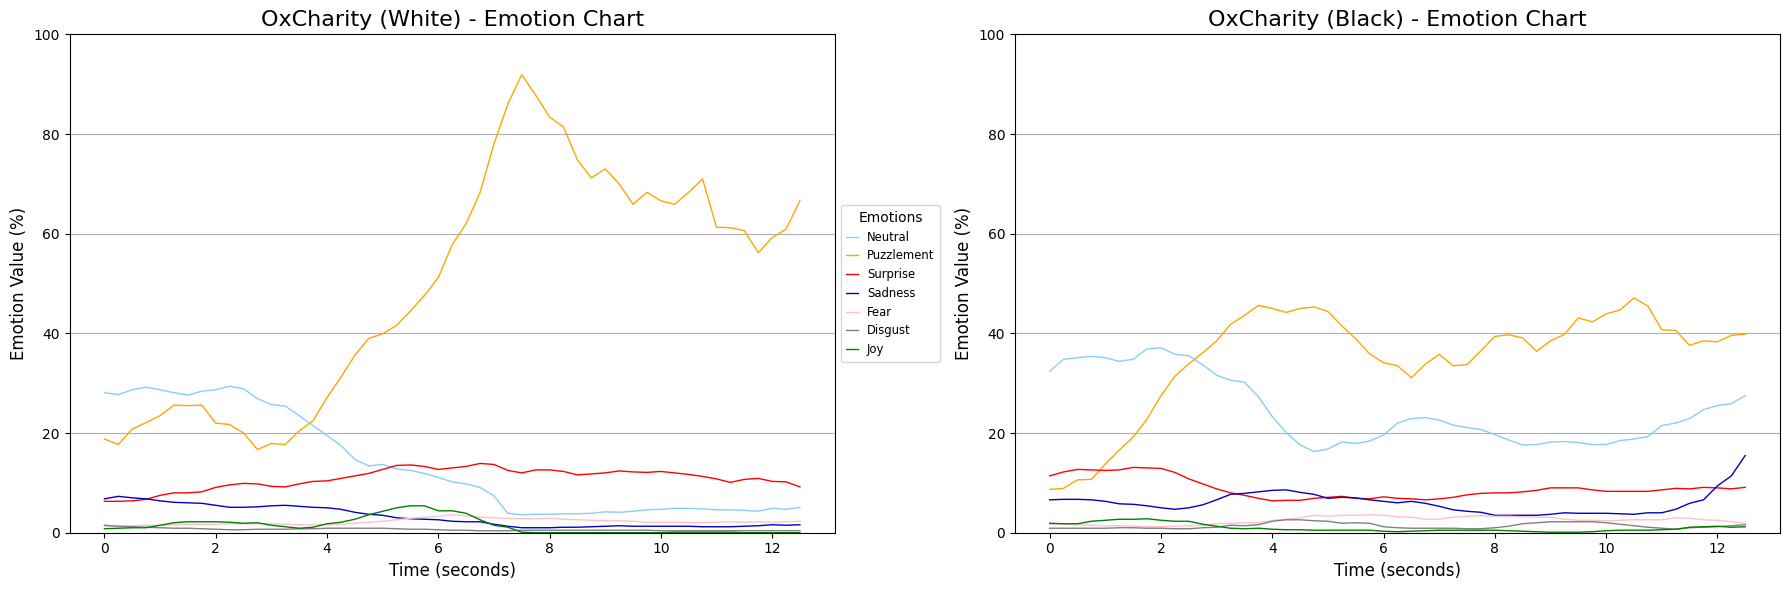

In [41]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of emotions and their corresponding custom colors
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value',
                   'emotions.sadness.value', 'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value']
custom_colors = ['lightskyblue','orange','red','mediumblue','pink', 'grey',  'green']  # Custom colors for each emotion

# Define y-axis limits and ticks (10% increments)
y_ticks = range(0, 101, 20)

# Plot for Ox (White) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_ox['start_time'], df_ox[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('OxCharity (White) - Emotion Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(0, 100)  # Set y-axis limits
ax1.legend(title="Emotions", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for Ox (Black) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_ox_inverse['start_time'], df_ox_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('OxCharity (Black) - Emotion Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(0, 100)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the side-by-side plots
plt.show()


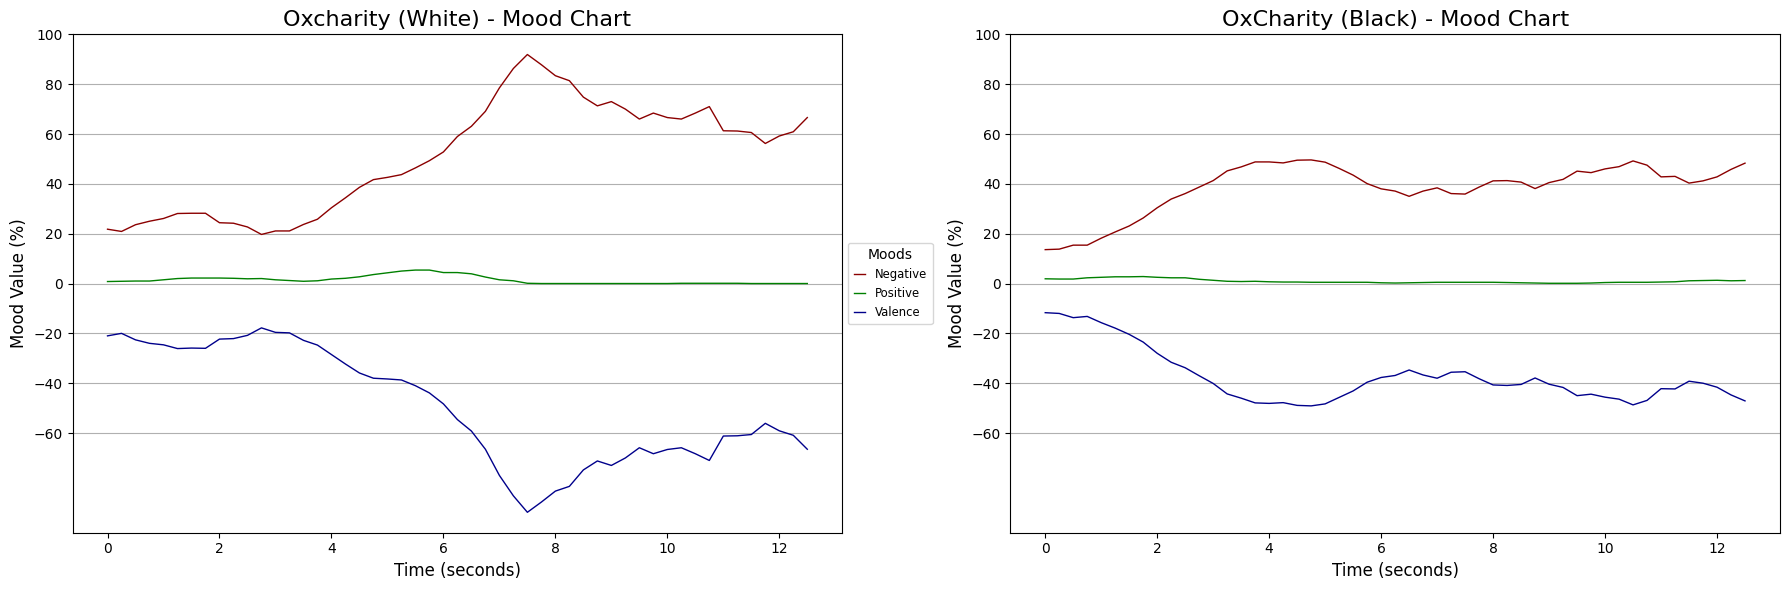

In [42]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of moods and their corresponding custom colors
emotion_metrics = ['mood.negative.value', 'mood.positive.value', 'mood.valence.value']
custom_colors = ['darkred','green', 'darkblue']  # Custom colors for each emotion

# Define y-axis limits and ticks (10% increments)
y_ticks = range(-60, 101, 20)

# Plot for OxCharity (White) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_ox['start_time'], df_ox[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('Oxcharity (White) - Mood Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(-100, 100)  # Set y-axis limits
ax1.legend(title="Moods", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for OxCharity (Black) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_ox_inverse['start_time'], df_ox_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('OxCharity (Black) - Mood Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(-100, 100)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the side-by-side plots
plt.show()


### **2.3. The Emotional Impact Difference Between HND Magazine OxCharity Magazine**

In [43]:
df_ox = df_ox.iloc[:51]
df_ox.info()
df_ox_inverse = df_ox_inverse.iloc[:51]
df_ox_inverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 51 non-null     float64
 1   end_time                   51 non-null     float64
 2   num_participants           51 non-null     int64  
 3   num_samples                51 non-null     int64  
 4   emotions.puzzlement.value  51 non-null     float64
 5   emotions.disgust.value     51 non-null     float64
 6   emotions.fear.value        51 non-null     float64
 7   emotions.joy.value         51 non-null     float64
 8   emotions.neutral.value     51 non-null     float64
 9   emotions.sadness.value     51 non-null     float64
 10  emotions.surprise.value    51 non-null     float64
 11  mood.negative.value        51 non-null     float64
 12  mood.positive.value        51 non-null     float64
 13  mood.valence.value         51 non-null     float64
d

#### **2.3.1. White Background Version**

In [44]:
# List of the columns with emotional or mood metrics to compare
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value', 'emotions.sadness.value',
                   'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value', 'mood.positive.value', 'mood.negative.value', 'mood.valence.value'
                   ]
# Initialize a dictionary to store the results
comparison_results = {'Metric': [], 'Mean Difference': [], 'T-statistic': [], 'P-value': []}

# Loop through each metric to calculate the mean difference and perform paired t-test
for column in emotion_metrics:
    # Calculate mean difference between the two datasets
    mean_diff = (df_hnd[column]- df_ox[column]).mean().round(4)

    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(df_hnd[column], df_ox[column])

    # Store the results in the dictionary
    comparison_results['Metric'].append(column)
    comparison_results['Mean Difference'].append(mean_diff)
    comparison_results['T-statistic'].append(t_stat.round(2))
    comparison_results['P-value'].append(p_value.round(5))

# Create a DataFrame from the results
comparison_df = pd.DataFrame(comparison_results)

# Display the comparison DataFrame
print("Comparison of Emotional and Mood Metrics between HND White and OxCharity White")
comparison_df


Comparison of Emotional and Mood Metrics between HND White and OxCharity White


,Metric,Mean Difference,T-statistic,P-value
0,emotions.neutral.value,0.1514,18.89,0.00000
1,emotions.puzzlement.value,-0.3296,-8.33,0.00000
2,emotions.surprise.value,-0.0252,-4.51,0.00004
3,emotions.sadness.value,0.0352,11.69,0.00000
4,emotions.fear.value,-0.0079,-8.61,0.00000
5,emotions.disgust.value,0.0082,6.94,0.00000
6,emotions.joy.value,-0.0093,-4.62,0.00003
7,mood.positive.value,-0.0093,-4.62,0.00003
8,mood.negative.value,-0.3130,-8.27,0.00000
9,mood.valence.value,0.3035,7.90,0.00000


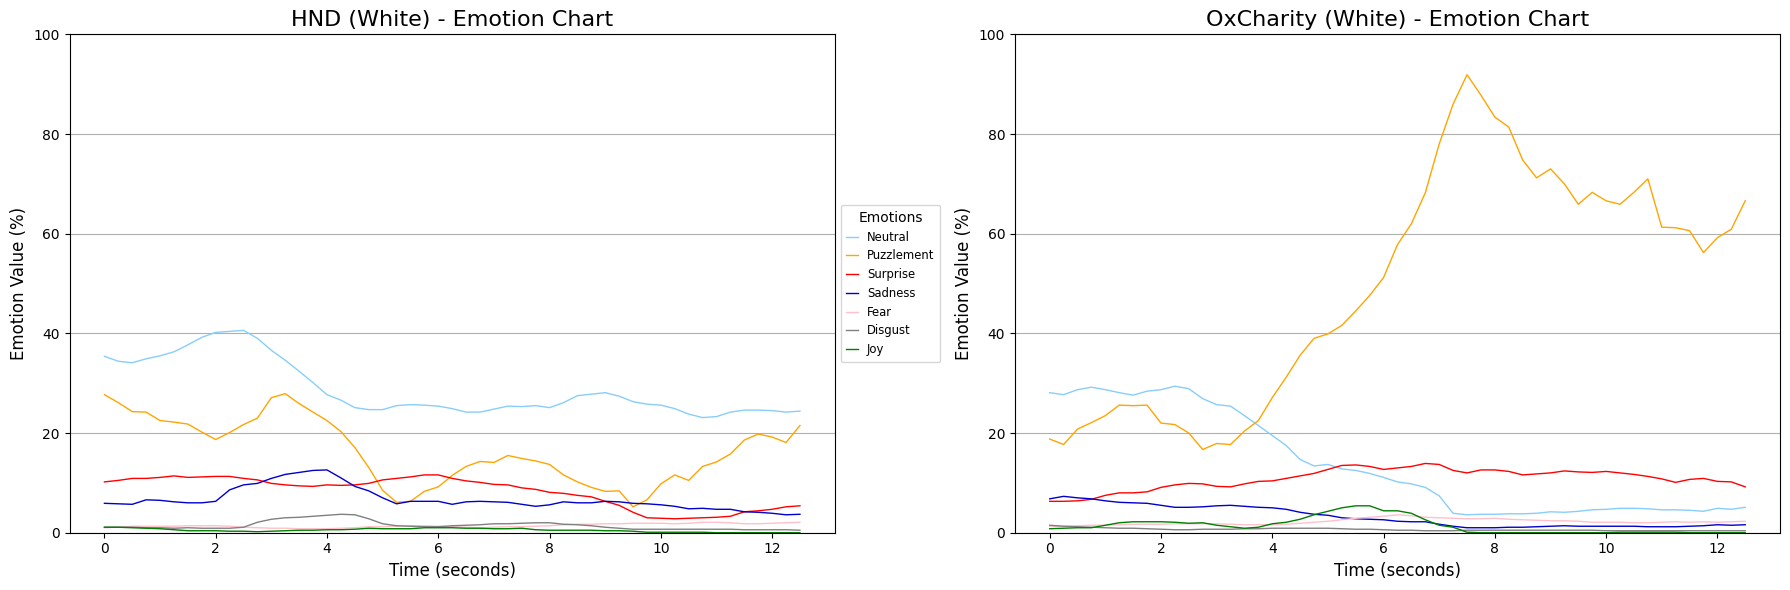

In [45]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of emotions and their corresponding custom colors
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value',
                   'emotions.sadness.value', 'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value']
custom_colors = ['lightskyblue','orange','red','mediumblue','pink', 'grey',  'green']  # Custom colors for each emotion

# Define y-axis limits and ticks (20% increments)
y_ticks = range(0, 101, 20)

# Plot for HND (White) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_hnd['start_time'], df_hnd[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('HND (White) - Emotion Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(0, 100)  # Set y-axis limits
ax1.legend(title="Emotions", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for OxCharity (White) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_ox['start_time'], df_ox[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('OxCharity (White) - Emotion Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(0, 100)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the side-by-side plots
plt.show()


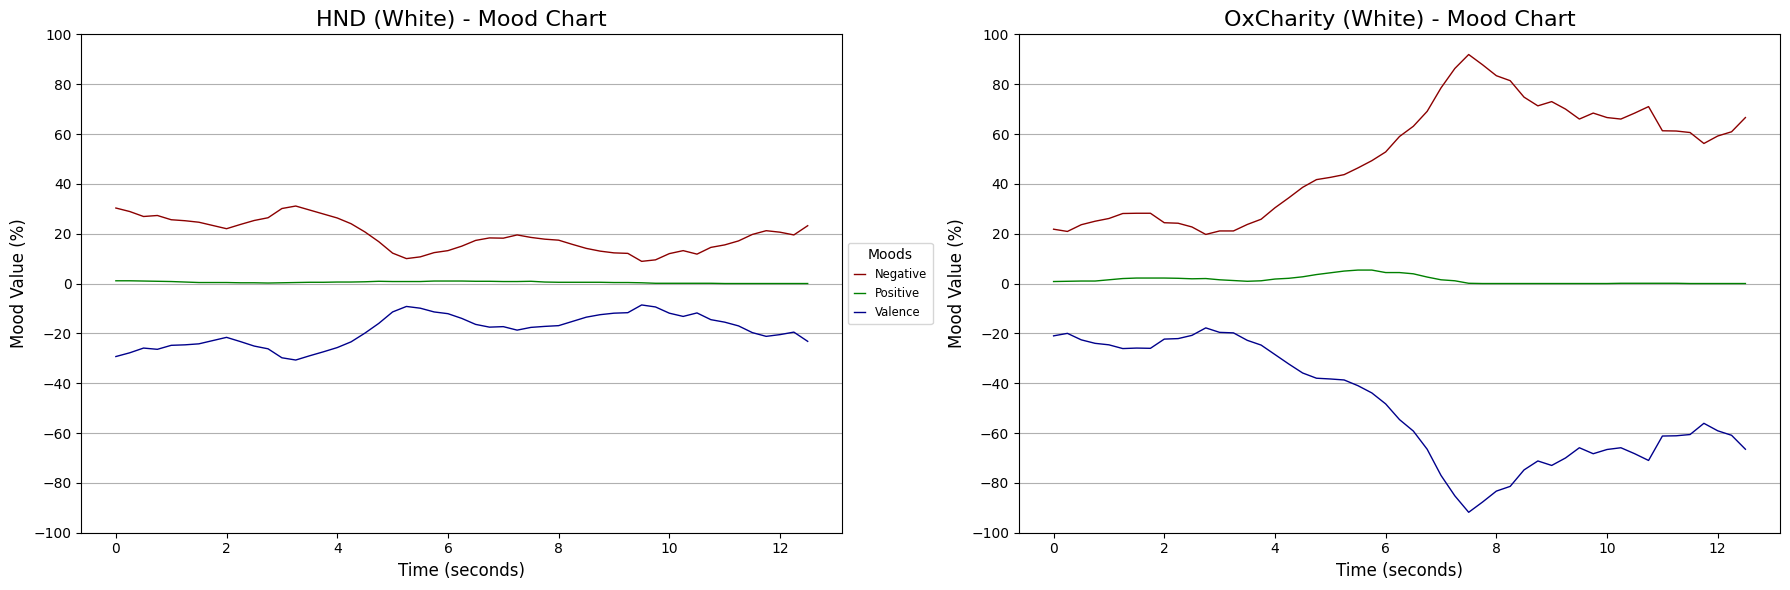

In [46]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of moods and their corresponding custom colors
emotion_metrics = ['mood.negative.value', 'mood.positive.value', 'mood.valence.value']
custom_colors = ['darkred','green', 'darkblue']  # Custom colors for each emotion

# Define y-axis limits and ticks (10% increments)
y_ticks = range(-100, 101, 20)

# Plot for HND (White) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_hnd['start_time'], df_hnd[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('HND (White) - Mood Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(-100, 100)  # Set y-axis limits
ax1.legend(title="Moods", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for OxCharity (White) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_ox['start_time'], df_ox[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('OxCharity (White) - Mood Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(-100, 100)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the side-by-side plots
plt.show()


#### **2.3.2. Black Background Version**

In [47]:
# List of the columns with emotional or mood metrics to compare
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value', 'emotions.sadness.value',
                   'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value', 'mood.positive.value', 'mood.negative.value', 'mood.valence.value'
                   ]
# Initialize a dictionary to store the results
comparison_results = {'Metric': [], 'Mean Difference': [], 'T-statistic': [], 'P-value': []}

# Loop through each metric to calculate the mean difference and perform paired t-test
for column in emotion_metrics:
    # Calculate mean difference between the two datasets
    mean_diff = (df_hnd_inverse[column]- df_ox_inverse[column]).mean().round(4)

    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(df_hnd_inverse[column], df_ox_inverse[column])

    # Store the results in the dictionary
    comparison_results['Metric'].append(column)
    comparison_results['Mean Difference'].append(mean_diff)
    comparison_results['T-statistic'].append(t_stat.round(2))
    comparison_results['P-value'].append(p_value.round(5))

# Create a DataFrame from the results
comparison_df = pd.DataFrame(comparison_results)

# Display the comparison DataFrame
print("Comparison of Emotional and Mood Metrics between HND Black and OxCharity Black")
comparison_df


Comparison of Emotional and Mood Metrics between HND Black and OxCharity Black


,Metric,Mean Difference,T-statistic,P-value
0,emotions.neutral.value,0.1008,10.93,0.00000
1,emotions.puzzlement.value,-0.0918,-5.79,0.00000
2,emotions.surprise.value,-0.0413,-19.59,0.00000
3,emotions.sadness.value,0.0044,1.24,0.22207
4,emotions.fear.value,-0.0034,-2.72,0.00889
5,emotions.disgust.value,-0.0051,-6.22,0.00000
6,emotions.joy.value,-0.0035,-4.72,0.00002
7,mood.positive.value,-0.0035,-4.72,0.00002
8,mood.negative.value,-0.0993,-6.82,0.00000
9,mood.valence.value,0.0961,6.43,0.00000


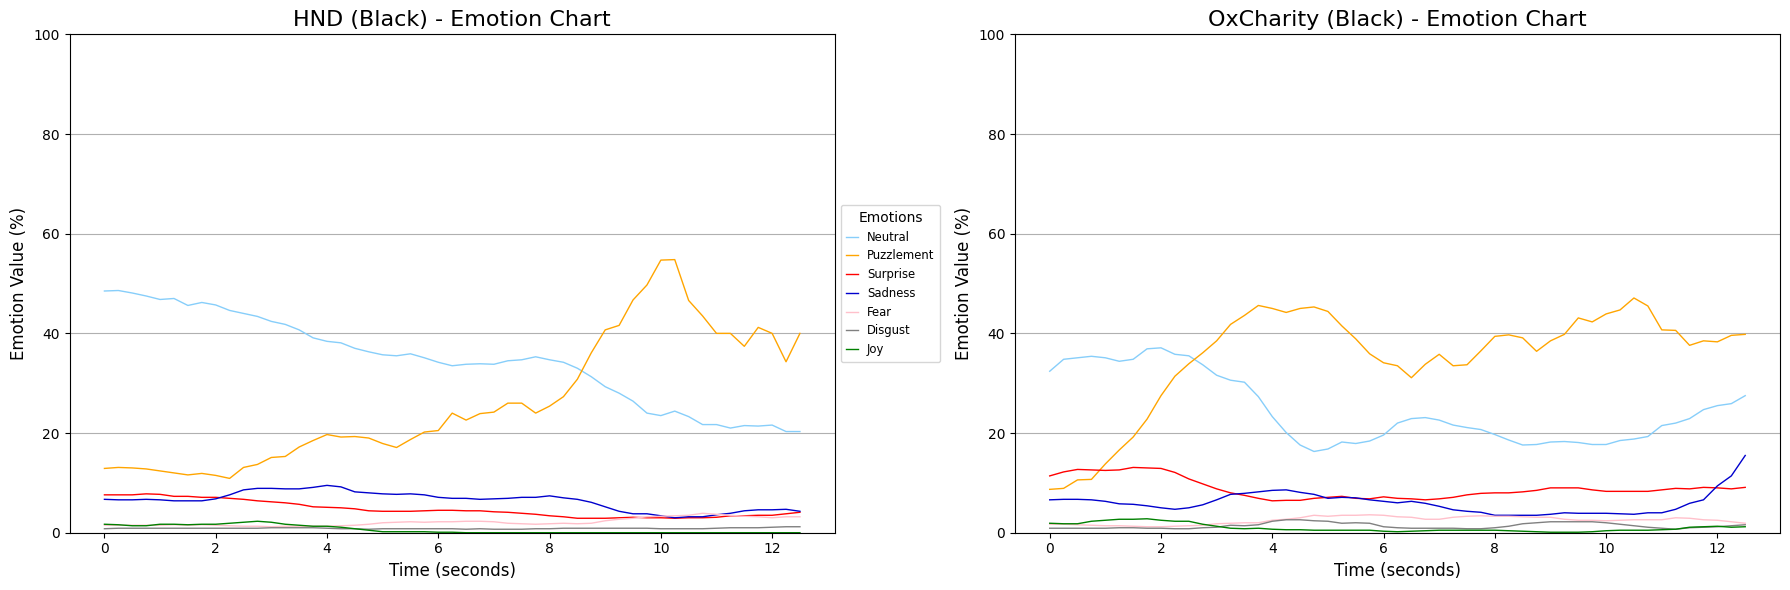

In [48]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of emotions and their corresponding custom colors
emotion_metrics = ['emotions.neutral.value', 'emotions.puzzlement.value', 'emotions.surprise.value',
                   'emotions.sadness.value', 'emotions.fear.value', 'emotions.disgust.value', 'emotions.joy.value']
custom_colors = ['lightskyblue','orange','red','mediumblue','pink', 'grey',  'green']  # Custom colors for each emotion

# Define y-axis limits and ticks (20% increments)
y_ticks = range(0, 101, 20)

# Plot for HND (Black) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_hnd_inverse['start_time'], df_hnd_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('HND (Black) - Emotion Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(0, 100)  # Set y-axis limits
ax1.legend(title="Emotions", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for OxCharity (Black) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_ox_inverse['start_time'], df_ox_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('OxCharity (Black) - Emotion Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Emotion Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(0, 100)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the side-by-side plots
plt.show()


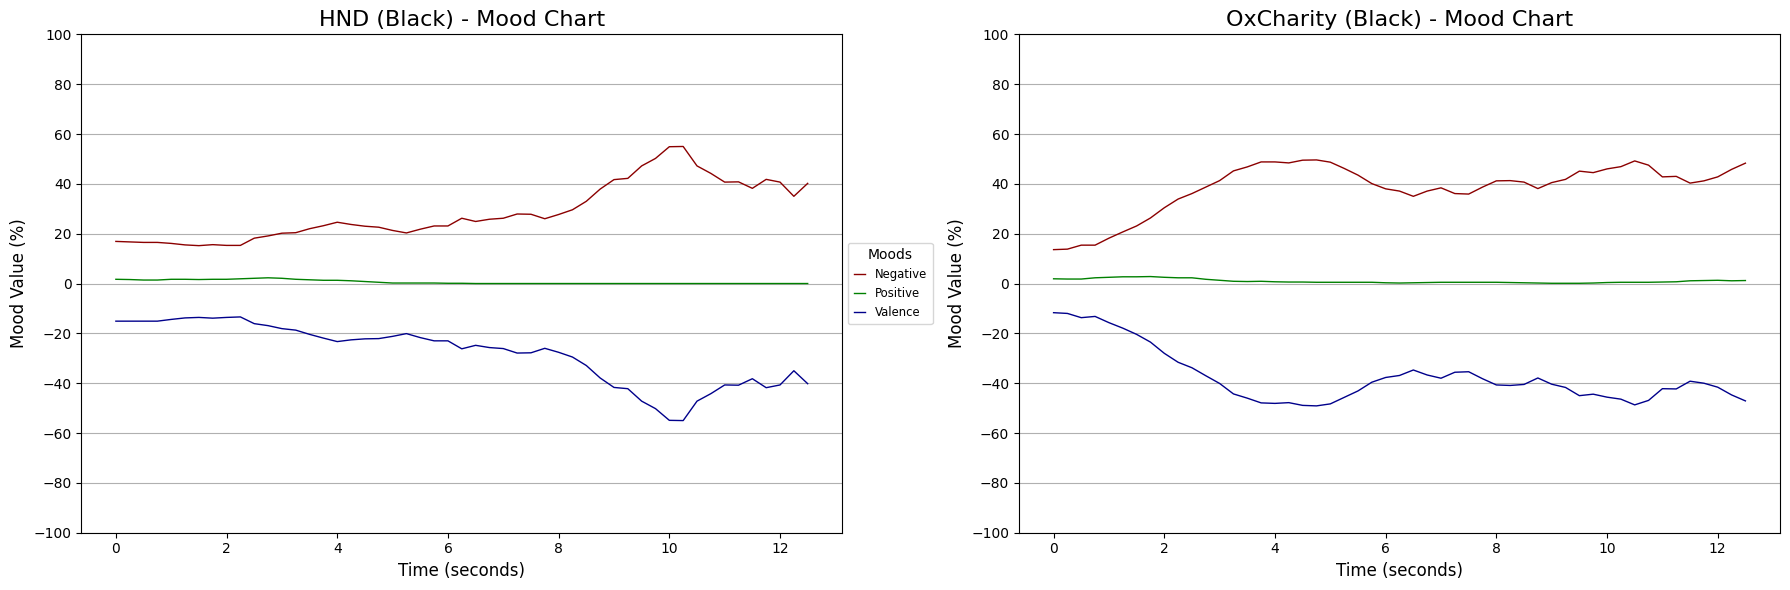

In [49]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figsize for proper layout

# List of moods and their corresponding custom colors
emotion_metrics = ['mood.negative.value', 'mood.positive.value', 'mood.valence.value']
custom_colors = ['darkred','green', 'darkblue']  # Custom colors for each emotion

# Define y-axis limits and ticks (20% increments)
y_ticks = range(-100, 101, 20)

# Plot for HND (Black) on the first axis (ax1)
for metric, color in zip(emotion_metrics, custom_colors):
    ax1.plot(df_hnd_inverse['start_time'], df_hnd_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the first plot
ax1.set_title('HND (Black) - Mood Chart', fontsize=16)
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax1.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax1.set_ylim(-100, 100)  # Set y-axis limits
ax1.legend(title="Moods", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', labelspacing=0.5, handlelength=1, borderpad=0.5)
ax1.grid(True, axis='y')  # Enable horizontal grid lines only

# Plot for OxCharity (Black) on the second axis (ax2)
for metric, color in zip(emotion_metrics, custom_colors):
    ax2.plot(df_ox_inverse['start_time'], df_ox_inverse[metric] * 100, label=metric.split(".")[-2].capitalize(), color=color, linewidth=1)

# Customize the second plot
ax2.set_title('OxCharity (Black) - Mood Chart', fontsize=16)
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Mood Value (%)', fontsize=12)  # Updated label to reflect percentage
ax2.set_yticks(y_ticks)  # Set y-axis ticks to 10% increments
ax2.set_ylim(-100, 100)  # Set y-axis limits
ax2.grid(True, axis='y')  # Enable horizontal grid lines only

# Adjust layout to make sure everything fits well
plt.tight_layout()

# Show the side-by-side plots
plt.show()
